In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
"""
Suppose you have the following dataset which contains (1st tab) 
a list of items purchased by a given user, (2nd tab) a mapping 
which maps the item_id to the item name and price, (3rd tab) a 
matrix that formats data from sheet 1 into a matrix with users 
in rows and the number of each item_id purchased in columns.

Using this data, can you create a similarity matrix for each item? 
Then can you create a heat chart that visually displays the similarity matrix?

Note: The purpose of doing this exercise is to explore ways of 
analyzing data that could be generalized by a group (think clustering).
"""

sheet2 = pd.read_csv('./data/grocery_shopping_sheet2a.csv')
sheet2.sample(10)

,item_name,Item_id,price
20,cheeses,21,2
30,pasta,31,1
2,pet items,3,2
34,soap,35,3
14,aluminum foil,15,4
27,canned vegetables,28,1
17,laundry detergent,18,7
21,frozen vegetables,22,1
4,waffles,5,2
16,beef,17,4


In [3]:
sheet2

,item_name,Item_id,price
0,sugar,1,2
1,lettuce,2,1
2,pet items,3,2
3,baby items,4,4
4,waffles,5,2
5,poultry,6,4
6,sandwich bags,7,3
7,butter,8,3
8,soda,9,1
9,carrots,10,1


In [4]:
sheet2.shape

(48, 3)

In [5]:
type(sheet2.Item_id.iloc[0])

numpy.int64

In [6]:
len(sheet2.Item_id.value_counts())

48

In [7]:
for ids in sheet2.Item_id.values:
    print(ids)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


In [8]:
item_id_dict = {str(x): 0 for x in sheet2.Item_id.values}
item_id_dict

{'1': 0,
 '2': 0,
 '3': 0,
 '4': 0,
 '5': 0,
 '6': 0,
 '7': 0,
 '8': 0,
 '9': 0,
 '10': 0,
 '11': 0,
 '12': 0,
 '13': 0,
 '14': 0,
 '15': 0,
 '16': 0,
 '17': 0,
 '18': 0,
 '19': 0,
 '20': 0,
 '21': 0,
 '22': 0,
 '23': 0,
 '24': 0,
 '25': 0,
 '26': 0,
 '27': 0,
 '28': 0,
 '29': 0,
 '30': 0,
 '31': 0,
 '32': 0,
 '33': 0,
 '34': 0,
 '35': 0,
 '36': 0,
 '37': 0,
 '38': 0,
 '39': 0,
 '40': 0,
 '41': 0,
 '42': 0,
 '43': 0,
 '44': 0,
 '45': 0,
 '46': 0,
 '47': 0,
 '48': 0}

In [9]:
sheet1 = pd.read_csv('./data/grocery_shopping_sheet1a.csv')
sheet1.sample(10)

,user_id,id
756,1236029,"1,33,18,34,41,26,39,37"
27923,79959,"46,9,10,44"
15053,272078,"16,26,41,23,32,38,27,43"
2904,1150551,"26,45,2"
6367,353671,"36,45,42,34,33,43,23,2"
28708,1130679,46
32486,376702,"36,22,42,10,2,13,6,45,32,40,20,21"
520,1066519,"27,10,2,44,45,40,3,46,28,29,43"
26330,1281823,"22,46"
19326,295176,"43,9,36,16,32"


In [10]:
sheet1.shape

(39474, 2)

In [11]:
sheet1.user_id.nunique()

24885

In [12]:
type(sheet1.id.iloc[0])

str

In [13]:
sheet1.id.iloc[0].split(',')

['27', '26']

In [14]:
for x in sheet1[sheet1.user_id == 120265].id:
    print(x.split(','))

['23', '45', '44', '47', '6', '28', '4', '25', '32', '20', '46']
['37', '34', '40', '13', '39', '42']


In [15]:
unique_user_ids = sheet1.user_id.unique()
type(unique_user_ids[1])

numpy.int64

In [16]:
tallys = []
for user in unique_user_ids:
    item_id_dict = {str(x): 0 for x in sheet2.Item_id.values}
    for lst in sheet1[sheet1.user_id == user].id:
        for ids in lst.split(','):
            if ids in item_id_dict:
                item_id_dict[ids] += 1
    tallys.append(item_id_dict)

In [17]:
len(tallys)

24885

In [18]:
tallys[0]

{'1': 0,
 '2': 0,
 '3': 0,
 '4': 0,
 '5': 0,
 '6': 0,
 '7': 0,
 '8': 0,
 '9': 0,
 '10': 0,
 '11': 0,
 '12': 0,
 '13': 0,
 '14': 0,
 '15': 0,
 '16': 0,
 '17': 0,
 '18': 0,
 '19': 0,
 '20': 0,
 '21': 0,
 '22': 0,
 '23': 0,
 '24': 0,
 '25': 0,
 '26': 1,
 '27': 1,
 '28': 0,
 '29': 0,
 '30': 0,
 '31': 0,
 '32': 0,
 '33': 0,
 '34': 0,
 '35': 0,
 '36': 0,
 '37': 0,
 '38': 0,
 '39': 0,
 '40': 0,
 '41': 0,
 '42': 0,
 '43': 0,
 '44': 0,
 '45': 0,
 '46': 0,
 '47': 0,
 '48': 0}

In [19]:
user_item_df = pd.DataFrame({'user': unique_user_ids
                             , 'tallys': tallys
                            })
user_item_df.head()

,user,tallys
0,222087,"{'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': ..."
1,1343649,"{'1': 0, '2': 1, '3': 0, '4': 0, '5': 0, '6': ..."
2,404134,"{'1': 2, '2': 0, '3': 0, '4': 1, '5': 0, '6': ..."
3,1110200,"{'1': 0, '2': 1, '3': 1, '4': 0, '5': 0, '6': ..."
4,224107,"{'1': 2, '2': 2, '3': 1, '4': 1, '5': 1, '6': ..."


In [20]:
user_item_df_ = user_item_df['tallys'].apply(pd.Series)
user_item_df_.head()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,2,1,0,0,0,...,1,0,0,0,0,0,0,1,2,1
2,2,0,0,1,0,0,0,0,2,1,...,0,0,0,1,2,0,0,1,1,0
3,0,1,1,0,0,1,0,0,1,0,...,1,1,0,0,1,0,0,1,2,1
4,2,2,1,1,1,1,1,1,3,0,...,0,2,0,1,0,2,0,0,1,1


In [21]:
user_item_df = pd.concat([user_item_df['user'], user_item_df_]
                         , axis = 1
                        )
user_item_df.head()

,user,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,222087,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1343649,0,1,0,0,0,2,1,0,0,...,1,0,0,0,0,0,0,1,2,1
2,404134,2,0,0,1,0,0,0,0,2,...,0,0,0,1,2,0,0,1,1,0
3,1110200,0,1,1,0,0,1,0,0,1,...,1,1,0,0,1,0,0,1,2,1
4,224107,2,2,1,1,1,1,1,1,3,...,0,2,0,1,0,2,0,0,1,1


In [22]:
from scipy.spatial.distance import pdist, squareform

In [23]:
similarity_arr = squareform(pdist(user_item_df.drop('user', axis=1).T
                                  , metric = 'euclidean'
                                 )
                           )
similarity_arr.shape

(48, 48)

In [24]:
similarity_arr # find the least distance

array([[  0.        , 126.40411386, 107.33592129, ..., 115.67194993,
        115.26057435, 109.89085494],
       [126.40411386,   0.        , 127.53430911, ..., 131.08012817,
        130.94655398, 133.18408313],
       [107.33592129, 127.53430911,   0.        , ..., 112.10263155,
        111.56164215, 102.62066069],
       ...,
       [115.67194993, 131.08012817, 112.10263155, ...,   0.        ,
        114.95651352, 109.52625256],
       [115.26057435, 130.94655398, 111.56164215, ..., 114.95651352,
          0.        , 109.15585188],
       [109.89085494, 133.18408313, 102.62066069, ..., 109.52625256,
        109.15585188,   0.        ]])

In [25]:
user_item_df.drop('user', axis=1).corr() # find the highest correlation

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
1,1.000000,0.238886,0.206039,0.136735,0.119243,0.135914,0.102346,0.121821,0.156018,0.137604,...,0.137811,0.136908,0.137097,0.136645,0.144441,0.145333,0.134491,0.141004,0.142335,0.111465
2,0.238886,1.000000,0.219637,0.135994,0.103919,0.187290,0.118194,0.146822,0.179812,0.278273,...,0.182032,0.176002,0.153458,0.274880,0.179008,0.276240,0.264485,0.172360,0.176098,0.130249
3,0.206039,0.219637,1.000000,0.129327,0.078257,0.127229,0.079229,0.103597,0.130854,0.117942,...,0.119305,0.139074,0.098749,0.121215,0.115766,0.130672,0.128459,0.118695,0.119167,0.097790
4,0.136735,0.135994,0.129327,1.000000,0.056863,0.077653,0.050284,0.072546,0.083298,0.090476,...,0.076650,0.094112,0.056822,0.071046,0.083933,0.083373,0.078750,0.083247,0.094719,0.075080
5,0.119243,0.103919,0.078257,0.056863,1.000000,0.075596,0.057751,0.069173,0.081988,0.075511,...,0.079143,0.080804,0.070014,0.078525,0.076359,0.084528,0.078992,0.079078,0.074524,0.050996
6,0.135914,0.187290,0.127229,0.077653,0.075596,1.000000,0.100229,0.115662,0.136986,0.124579,...,0.128037,0.131981,0.115631,0.136225,0.132931,0.131153,0.141942,0.127709,0.294482,0.107329
7,0.102346,0.118194,0.079229,0.050284,0.057751,0.100229,1.000000,0.074615,0.086099,0.078680,...,0.079575,0.084876,0.078163,0.094412,0.078656,0.082629,0.082967,0.079929,0.083486,0.062632
8,0.121821,0.146822,0.103597,0.072546,0.069173,0.115662,0.074615,1.000000,0.104179,0.129987,...,0.109128,0.109570,0.087365,0.119632,0.096812,0.109044,0.113043,0.102149,0.108302,0.196273
9,0.156018,0.179812,0.130854,0.083298,0.081988,0.136986,0.086099,0.104179,1.000000,0.129445,...,0.125823,0.136551,0.108813,0.123652,0.277274,0.124214,0.119791,0.135812,0.131368,0.093216
10,0.137604,0.278273,0.117942,0.090476,0.075511,0.124579,0.078680,0.129987,0.129445,1.000000,...,0.133555,0.128473,0.107501,0.277195,0.117338,0.272305,0.271857,0.131703,0.131874,0.114961


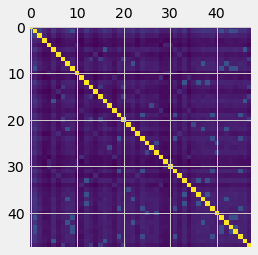

In [26]:
plt.matshow(user_item_df.drop('user', axis=1).corr());

In [27]:
user_item_df.drop('user', axis=1).corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
1,1.00,0.24,0.21,0.14,0.12,0.14,0.10,0.12,0.16,0.14,0.11,0.09,0.14,0.12,0.09,0.13,0.14,0.12,0.10,0.14,0.13,0.13,0.15,0.11,0.15,0.13,0.12,0.14,0.10,0.11,0.11,0.14,0.11,0.16,0.09,0.13,0.15,0.15,0.14,0.14,0.14,0.14,0.14,0.15,0.13,0.14,0.14,0.11
2,0.24,1.00,0.22,0.14,0.10,0.19,0.12,0.15,0.18,0.28,0.11,0.11,0.19,0.13,0.11,0.14,0.19,0.16,0.11,0.17,0.14,0.16,0.18,0.14,0.17,0.15,0.14,0.16,0.12,0.11,0.12,0.18,0.13,0.18,0.10,0.15,0.18,0.19,0.18,0.18,0.15,0.27,0.18,0.28,0.26,0.17,0.18,0.13
3,0.21,0.22,1.00,0.13,0.08,0.13,0.08,0.10,0.13,0.12,0.08,0.07,0.12,0.10,0.07,0.10,0.12,0.11,0.08,0.11,0.11,0.12,0.12,0.09,0.13,0.10,0.10,0.11,0.08,0.08,0.08,0.13,0.10,0.12,0.08,0.10,0.11,0.13,0.12,0.14,0.10,0.12,0.12,0.13,0.13,0.12,0.12,0.10
4,0.14,0.14,0.13,1.00,0.06,0.08,0.05,0.07,0.08,0.09,0.06,0.04,0.09,0.07,0.05,0.07,0.09,0.07,0.06,0.08,0.08,0.08,0.09,0.05,0.08,0.06,0.06,0.06,0.07,0.05,0.05,0.08,0.07,0.09,0.05,0.08,0.09,0.08,0.08,0.09,0.06,0.07,0.08,0.08,0.08,0.08,0.09,0.08
5,0.12,0.10,0.08,0.06,1.00,0.08,0.06,0.07,0.08,0.08,0.12,0.05,0.07,0.06,0.04,0.06,0.07,0.07,0.05,0.07,0.07,0.07,0.08,0.05,0.08,0.07,0.07,0.08,0.04,0.12,0.12,0.07,0.05,0.07,0.05,0.07,0.08,0.08,0.08,0.08,0.07,0.08,0.08,0.08,0.08,0.08,0.07,0.05
6,0.14,0.19,0.13,0.08,0.08,1.00,0.10,0.12,0.14,0.12,0.08,0.08,0.13,0.12,0.08,0.10,0.29,0.11,0.10,0.14,0.11,0.12,0.13,0.11,0.12,0.13,0.11,0.12,0.10,0.08,0.07,0.14,0.09,0.13,0.09,0.10,0.11,0.14,0.13,0.13,0.12,0.14,0.13,0.13,0.14,0.13,0.29,0.11
7,0.10,0.12,0.08,0.05,0.06,0.10,1.00,0.07,0.09,0.08,0.05,0.07,0.08,0.06,0.13,0.05,0.09,0.07,0.07,0.08,0.08,0.07,0.08,0.14,0.09,0.07,0.06,0.08,0.05,0.06,0.05,0.08,0.13,0.07,0.05,0.08,0.08,0.08,0.08,0.08,0.08,0.09,0.08,0.08,0.08,0.08,0.08,0.06
8,0.12,0.15,0.10,0.07,0.07,0.12,0.07,1.00,0.10,0.13,0.07,0.07,0.12,0.19,0.08,0.20,0.12,0.10,0.08,0.10,0.20,0.11,0.10,0.08,0.11,0.10,0.09,0.09,0.06,0.08,0.08,0.11,0.08,0.12,0.08,0.10,0.11,0.10,0.11,0.11,0.09,0.12,0.10,0.11,0.11,0.10,0.11,0.20
9,0.16,0.18,0.13,0.08,0.08,0.14,0.09,0.10,1.00,0.13,0.08,0.09,0.13,0.11,0.08,0.11,0.13,0.12,0.07,0.13,0.12,0.11,0.28,0.09,0.14,0.11,0.11,0.12,0.08,0.08,0.09,0.13,0.08,0.13,0.08,0.12,0.11,0.28,0.13,0.14,0.11,0.12,0.28,0.12,0.12,0.14,0.13,0.09
10,0.14,0.28,0.12,0.09,0.08,0.12,0.08,0.13,0.13,1.00,0.08,0.08,0.13,0.11,0.09,0.11,0.14,0.11,0.08,0.13,0.11,0.12,0.12,0.09,0.13,0.11,0.11,0.12,0.09,0.08,0.08,0.12,0.09,0.13,0.08,0.10,0.13,0.13,0.13,0.13,0.11,0.28,0.12,0.27,0.27,0.13,0.13,0.11


In [28]:
import seaborn as sns

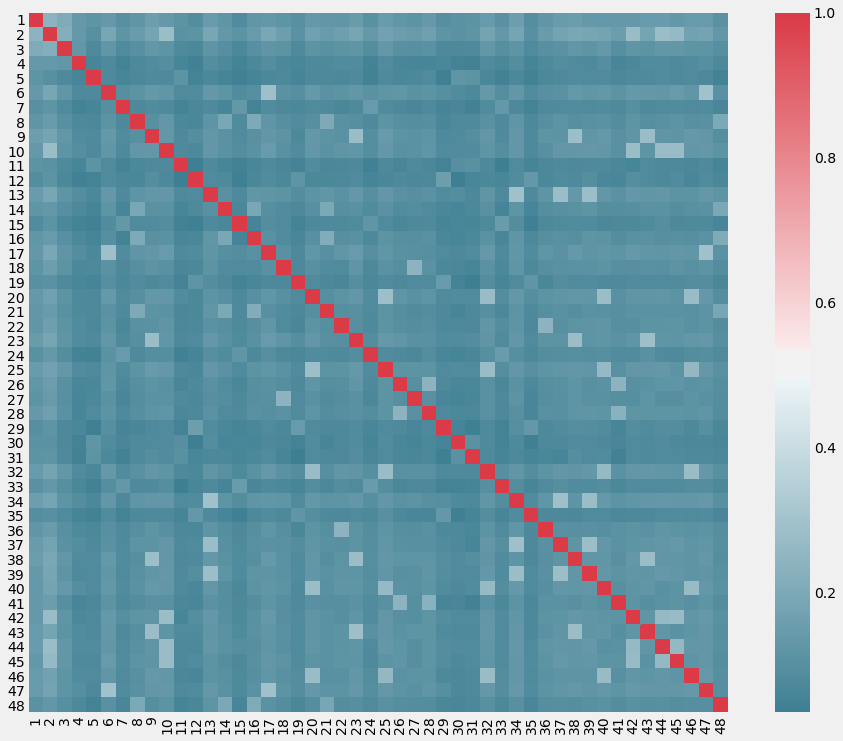

In [29]:
f, ax = plt.subplots(figsize=(15, 12))
corr = user_item_df.drop('user', axis=1).corr()
sns.heatmap(corr
            , mask=np.zeros_like(corr, dtype=np.bool)
            , cmap=sns.diverging_palette(220, 10, as_cmap=True)
            , square=True, ax=ax
           );

### Recommender System